In [27]:
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import numpy as np
import os
from collections import Counter
import pandas as pd

from load_all_datasets import load
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


flower


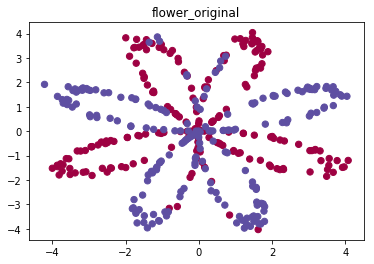

noisy_circles


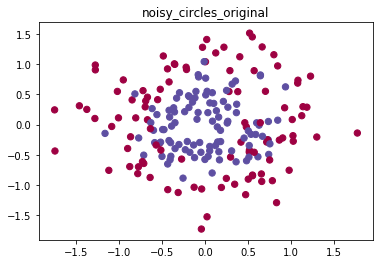

noisy_moons


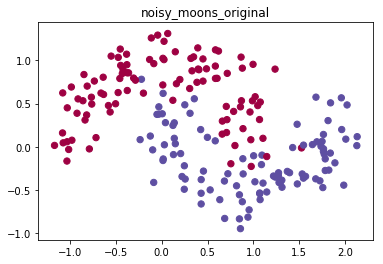

blobs


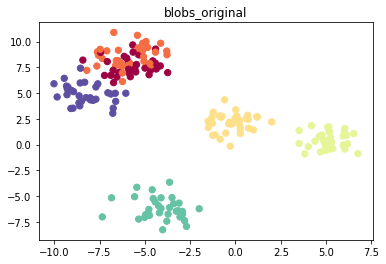

gaussian_quantiles


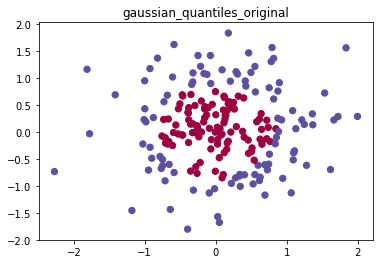

In [7]:
datas = load()

for name, X, Y in datas:
    print(name)
    plt.scatter(X[:, 0], X[:, 1], c=Y , s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_original')
    plt.show()

In [51]:
# import some data to play with
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris['feature_names'])
df_iris['target'] = list(map(lambda x:iris.target_names[x], iris.target))
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
df_iris.groupby('target').count()
# df_iris.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


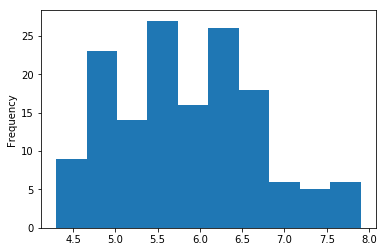

In [60]:
df_iris['sepal length (cm)'].plot('hist')
plt.show()

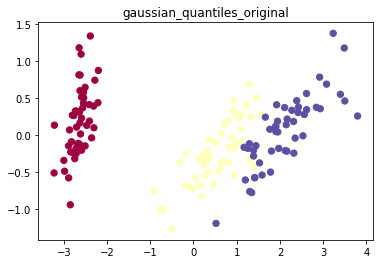

In [64]:
iris_X = PCA(n_components=2).fit_transform(df_iris[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values)
iris_y = iris.target

plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y , s=40, cmap=plt.cm.Spectral);
plt.title(name+'_original')
plt.show()

## 1. K-means
### steps
1. 設定重心: 決定要分幾個群，下圖決定分成三群，所以初始重心有三個，這三個點是隨機產生的
2. 分群: 找到分別最靠近這三個點的所有資料點，並做第一個迴圈的分群
3. 尋找重心: 分完群之後，計算所有資料點的重心(element-wise的平均)，做為下一個迴圈的分群標準
....
4. 停止: 重複上述方法，只到不會有資料點因為重新尋找重心而改變群組

### visualize
1. web: [game](http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)
2. GIF: ![kmeans](./imgs/kmeans.gif)

### parameters
|參數 | 意義|
|--- | ---|
|n_cluster | 要分成幾個群|
|random_state | 決定初始點的隨機seed|

### pros & cons
1. 一開始需要決定要分成幾個群


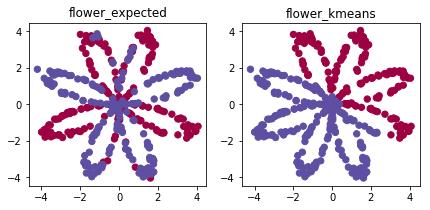

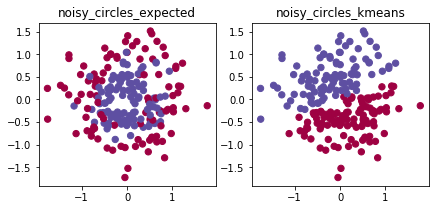

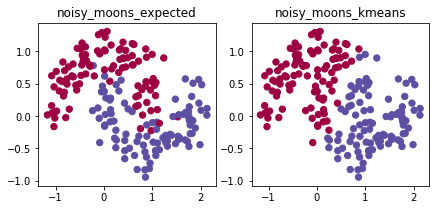

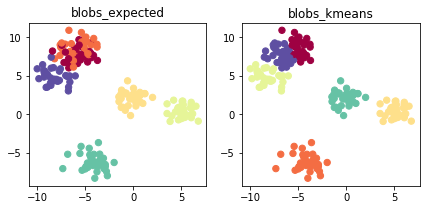

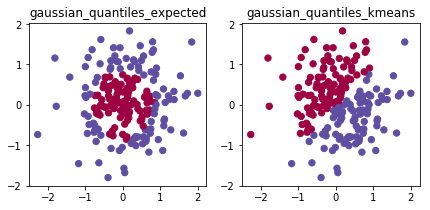

In [16]:
for name, X, Y in datas:
    plt.figure(figsize=(7,3))

    
    axes1 = plt.subplot(1, 2, 1)
    axes1.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title(name + "_expected")
    
    axes2 = plt.subplot(1, 2, 2)
    n_clusters = len(set(Y))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)
    axes2.scatter(X[:, 0], X[:, 1], c=kmeans, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_kmeans')

    plt.show()

In [ ]:
# please implement in iris_X, iris_y, and draw the result out

## 2. Hierarchical Clustering
### steps
hierarchical的分群方法，步驟簡述如下，可參考下圖(取自維基百科):
1. 把每一個點當作一個群組
2. 透過掃描過整個資料及尋找出最近的兩個群組，並把這兩個點榜再一起變成一個群組
3. 尋找下一個最近的的兩個群組，再綁再一起變成一個群組
4. ....
5. 停止: 直到所有資料都被分成一群，或是透過設定參數到分到幾個群時自動停止
![hierarchical](./imgs/Hierarchical_clustering.svg.png)

### parameters
1. table

參數 | 意義
--- | ---
linkage | 如何衡量群與群之間的距離。(註解)
n_clusters | 分成幾個群

2. 註解:
- ward(single): 兩個群中最近的點。
- complete: 兩個群中最遠的點。
- average:兩個群的重心。

### pros & cons
1. 比較耗效能: 因為有100萬筆資料，就要跑100萬次迴圈，每一次迴圈都要掃描過每一筆資料，才能跑完。
2. 很適合用來做生物分類，因為它可以完整畫出分類樹狀圖。

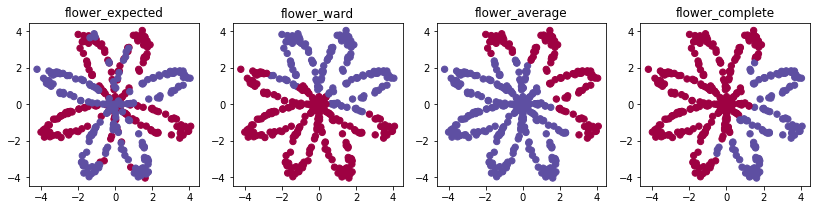

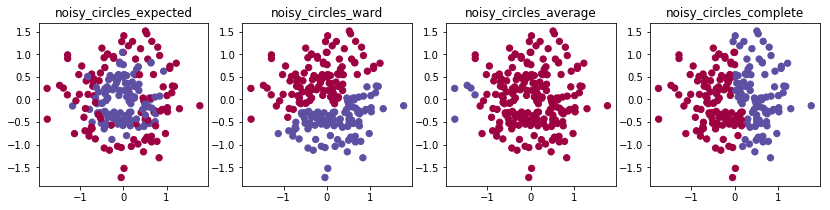

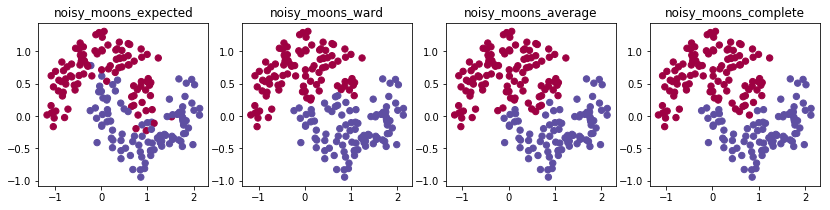

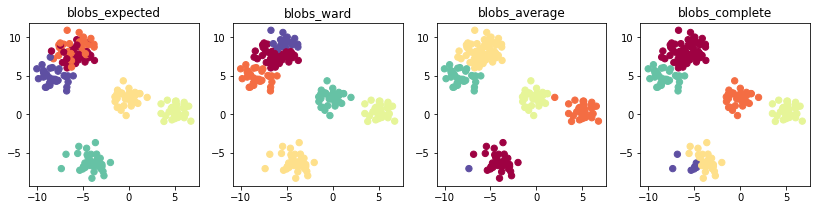

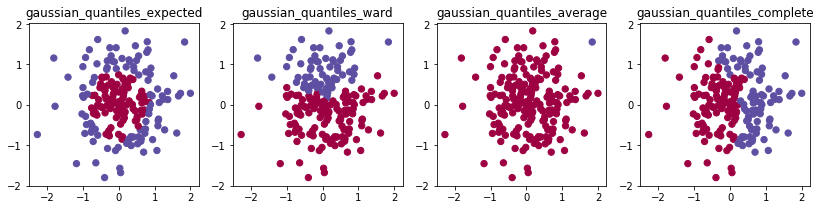

In [17]:
linkage = ['ward', 'average', 'complete']
for name, X, Y in datas:
    
    plt.figure(figsize=(14,3))

    axes1 = plt.subplot(1, 4, 1)
    axes1.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_expected')

    axes2 = plt.subplot(1, 4, 2)
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[0], n_clusters=n_clusters).fit_predict(X)
    axes2.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_' + linkage[0])

    axes3 = plt.subplot(1, 4, 3)
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[1], n_clusters=n_clusters).fit_predict(X)
    axes3.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_' + linkage[1])

    
    axes4 = plt.subplot(1, 4, 4)
    n_clusters = len(set(Y))
    hierarchy = AgglomerativeClustering(linkage=linkage[2], n_clusters=n_clusters).fit_predict(X)
    axes4.scatter(X[:, 0], X[:, 1], c=hierarchy, s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_' + linkage[2])

    
    
    plt.show()

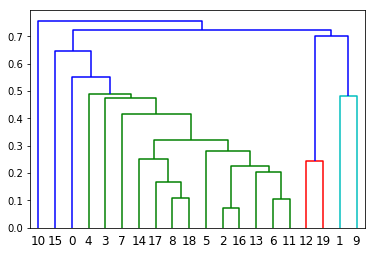

In [69]:
# Other Method 
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X[:20], 'single')
plt.figure()
dn = dendrogram(Z)
plt.show() 

In [ ]:
# please implement in iris_X, iris_y, and draw the result out

## 3. Density Based Clustering (DBSCAN)
### steps
顧名思義，這種分群演算法計算的是密度，透過設定多長的半徑內，有出現幾個點，不斷延伸，延伸到無法延伸，所有出現在前面延伸範圍的點分成一個群組，請見下圖(取自[stackexchange](https://stats.stackexchange.com/questions/194734/dbscan-what-is-a-core-point))。
![DBSCAN](./imgs/dbscan.png)

### parameters
參數 | 意義
--- | ---
eps | 半徑

### pros & cons
1. 常常用來偵測Noisy Data。
2. 無法設定要分成幾個群。

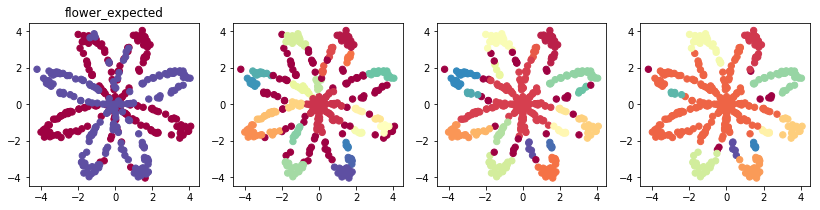

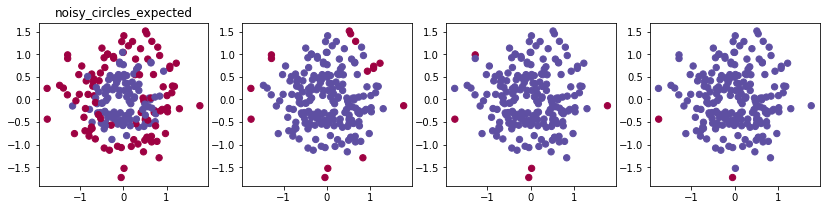

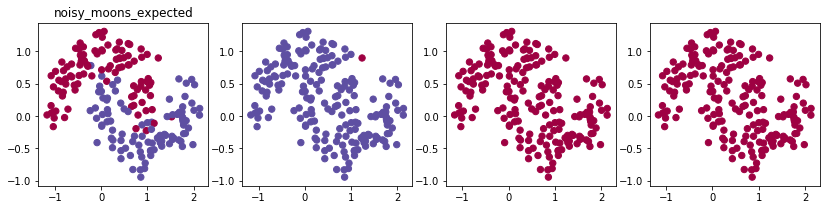

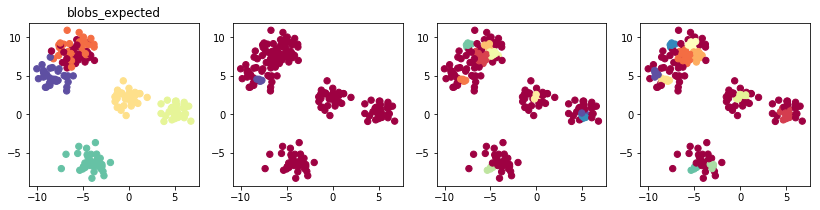

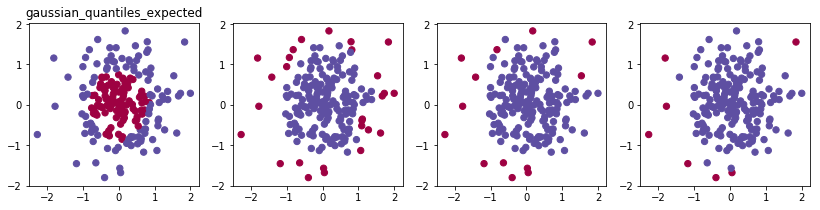

In [66]:
epss = [0.3, 0.4, 0.5]
for name, X, Y in datas:
    
    plt.figure(figsize=(14,3))

    
    axes1 = plt.subplot(1, 4, 1)
    axes1.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title(name+'_expected')
    
    
    axes2 = plt.subplot(1, 4, 2)
    dbscan = DBSCAN(eps=epss[0]).fit_predict(X)
    axes2.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)


    axes3 = plt.subplot(1, 4, 3)
    dbscan = DBSCAN(eps=epss[1]).fit_predict(X)
    axes3.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)

    
    axes3 = plt.subplot(1, 4, 4)
    dbscan = DBSCAN(eps=epss[2]).fit_predict(X)
    axes3.scatter(X[:, 0], X[:, 1], c=dbscan, s=40, cmap=plt.cm.Spectral)

    
    
    plt.show()

In [ ]:
# please implement in iris_X, iris_y, and draw the result out